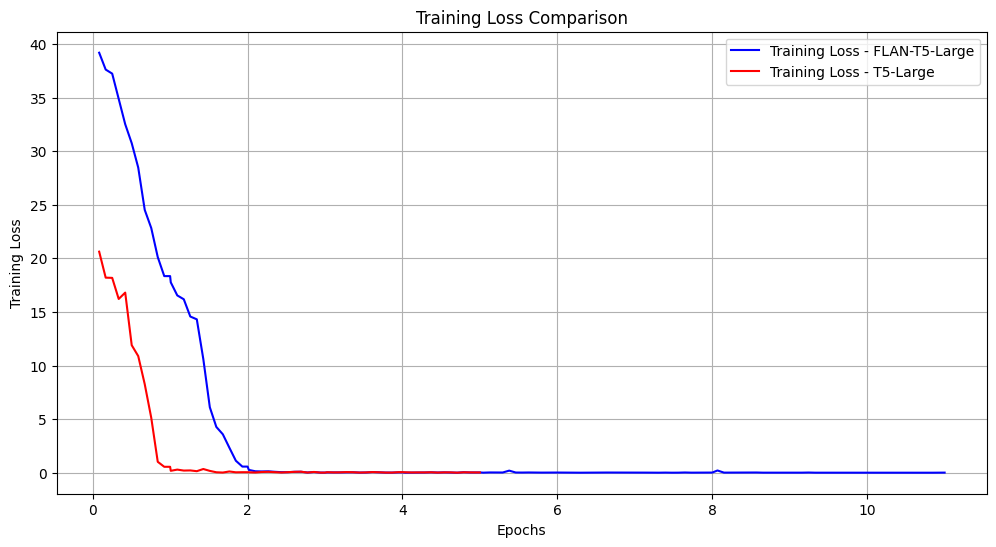

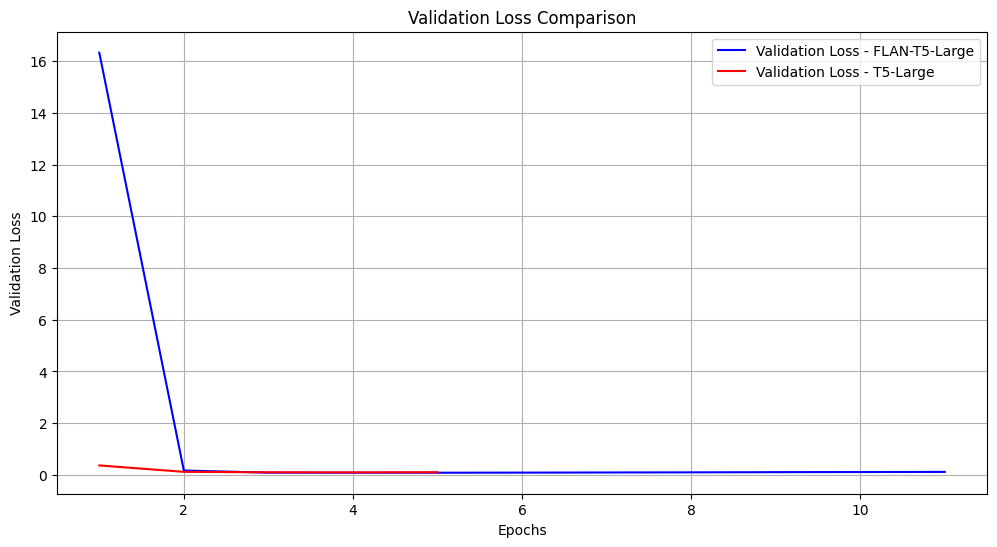

In [1]:
import re
import matplotlib.pyplot as plt

def extract_data(data):
    lines = data.split('\n')

    epoch_regex = r'Epoch: (\d+\.\d+)'
    train_loss_regex = r'Training Loss: (\d+\.\d+)'
    val_loss_regex = r'Validation Loss: (\d+\.\d+)'

    epochs_train = []
    epochs_val = []
    train_losses = []
    val_losses = []

    last_train_loss = None  

    for line in lines:
        epoch_match = re.search(epoch_regex, line)
        train_loss_match = re.search(train_loss_regex, line)
        val_loss_match = re.search(val_loss_regex, line)

        if epoch_match:
            current_epoch = float(epoch_match.group(1))

            if train_loss_match:
                last_train_loss = float(train_loss_match.group(1))
                if current_epoch not in epochs_train:  
                    epochs_train.append(current_epoch)
                    train_losses.append(last_train_loss)

            if val_loss_match:
                epochs_val.append(current_epoch)
                val_losses.append(float(val_loss_match.group(1)))
                # Use the most recent training loss value for this epoch
                if last_train_loss is not None and current_epoch not in epochs_train:
                    epochs_train.append(current_epoch)
                    train_losses.append(last_train_loss)

    return epochs_train, train_losses, epochs_val, val_losses


data_file1 = ('./Models and Results/Seeded Models/FlanT5LargeProcedure (Data with GPT)/training_logs.txt')
data_file2 = ('./Models and Results/Seeded Models/T5LargeProcedure (Data with GPT)/training_logs.txt')  

with open(data_file1, 'r') as f1:
    data1 = f1.read()

with open(data_file2, 'r') as f2:
    data2 = f2.read()

epochs_train1, train_losses1, epochs_val1, val_losses1 = extract_data(data1)
epochs_train2, train_losses2, epochs_val2, val_losses2 = extract_data(data2)

# Plot Training Losses
plt.figure(figsize=(12, 6))
plt.plot(epochs_train1, train_losses1, label='Training Loss - FLAN-T5-Large', color='blue')
plt.plot(epochs_train2, train_losses2, label='Training Loss - T5-Large', color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plot Validation Losses
plt.figure(figsize=(12, 6))
plt.plot(epochs_val1, val_losses1, label='Validation Loss - FLAN-T5-Large', color='blue')
plt.plot(epochs_val2, val_losses2, label='Validation Loss - T5-Large', color='red')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()